In [1]:
import pandas as pd 
import numpy as np
from pandas import Series,DataFrame
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
df = pd.read_csv('weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [5]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [6]:
df.drop(['Evaporation','Sunshine','Cloud9am','Cloud3pm','Date'],inplace=True,axis=1)

In [7]:

df.shape


(145460, 18)

In [8]:
df.dropna(inplace=True,axis=0)
df.shape

(112925, 18)

In [9]:
df.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [10]:
df['Mean_pressure']=(df['Pressure9am']+df['Pressure3pm'])/2
df['Mean_windsp']=(df['WindSpeed9am']+df['WindSpeed3pm'])/2
df['Mean_Humidity']=(df['Humidity9am']+df['Humidity3pm'])/2
df['Mean_Temp']=(df['Temp9am']+df['Temp3pm'])/2
df

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,...,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Mean_pressure,Mean_windsp,Mean_Humidity,Mean_Temp
0,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,...,1007.7,1007.1,16.9,21.8,No,No,1007.40,22.0,46.5,19.35
1,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,...,1010.6,1007.8,17.2,24.3,No,No,1009.20,13.0,34.5,20.75
2,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,...,1007.6,1008.7,21.0,23.2,No,No,1008.15,22.5,34.0,22.10
3,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,...,1017.6,1012.8,18.1,26.5,No,No,1015.20,10.0,30.5,22.30
4,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,...,1010.8,1006.0,17.8,29.7,No,No,1008.40,13.5,57.5,23.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,Uluru,3.5,21.8,0.0,E,31.0,ESE,E,15.0,13.0,...,1024.7,1021.2,9.4,20.9,No,No,1022.95,14.0,43.0,15.15
145455,Uluru,2.8,23.4,0.0,E,31.0,SE,ENE,13.0,11.0,...,1024.6,1020.3,10.1,22.4,No,No,1022.45,12.0,37.5,16.25
145456,Uluru,3.6,25.3,0.0,NNW,22.0,SE,N,13.0,9.0,...,1023.5,1019.1,10.9,24.5,No,No,1021.30,11.0,38.5,17.70
145457,Uluru,5.4,26.9,0.0,N,37.0,SE,WNW,9.0,9.0,...,1021.0,1016.8,12.5,26.1,No,No,1018.90,9.0,38.5,19.30


In [11]:
df.drop(['Pressure9am','Pressure3pm','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Temp9am','Temp3pm'],inplace=True,axis=1)

In [12]:
df.drop(['WindDir9am','WindDir3pm'],inplace= True,axis=1)

In [13]:
df

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,RainToday,RainTomorrow,Mean_pressure,Mean_windsp,Mean_Humidity,Mean_Temp
0,Albury,13.4,22.9,0.6,W,44.0,No,No,1007.40,22.0,46.5,19.35
1,Albury,7.4,25.1,0.0,WNW,44.0,No,No,1009.20,13.0,34.5,20.75
2,Albury,12.9,25.7,0.0,WSW,46.0,No,No,1008.15,22.5,34.0,22.10
3,Albury,9.2,28.0,0.0,NE,24.0,No,No,1015.20,10.0,30.5,22.30
4,Albury,17.5,32.3,1.0,W,41.0,No,No,1008.40,13.5,57.5,23.75
...,...,...,...,...,...,...,...,...,...,...,...,...
145454,Uluru,3.5,21.8,0.0,E,31.0,No,No,1022.95,14.0,43.0,15.15
145455,Uluru,2.8,23.4,0.0,E,31.0,No,No,1022.45,12.0,37.5,16.25
145456,Uluru,3.6,25.3,0.0,NNW,22.0,No,No,1021.30,11.0,38.5,17.70
145457,Uluru,5.4,26.9,0.0,N,37.0,No,No,1018.90,9.0,38.5,19.30


In [14]:
df["Location"].unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'NorahHead', 'NorfolkIsland', 'Richmond', 'Sydney',
       'SydneyAirport', 'WaggaWagga', 'Williamtown', 'Wollongong',
       'Canberra', 'Tuggeranong', 'Ballarat', 'Bendigo', 'Sale',
       'MelbourneAirport', 'Melbourne', 'Mildura', 'Nhil', 'Portland',
       'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns', 'GoldCoast',
       'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa', 'Woomera',
       'Witchcliffe', 'PearceRAAF', 'PerthAirport', 'Perth', 'Walpole',
       'Hobart', 'Launceston', 'AliceSprings', 'Darwin', 'Katherine',
       'Uluru'], dtype=object)

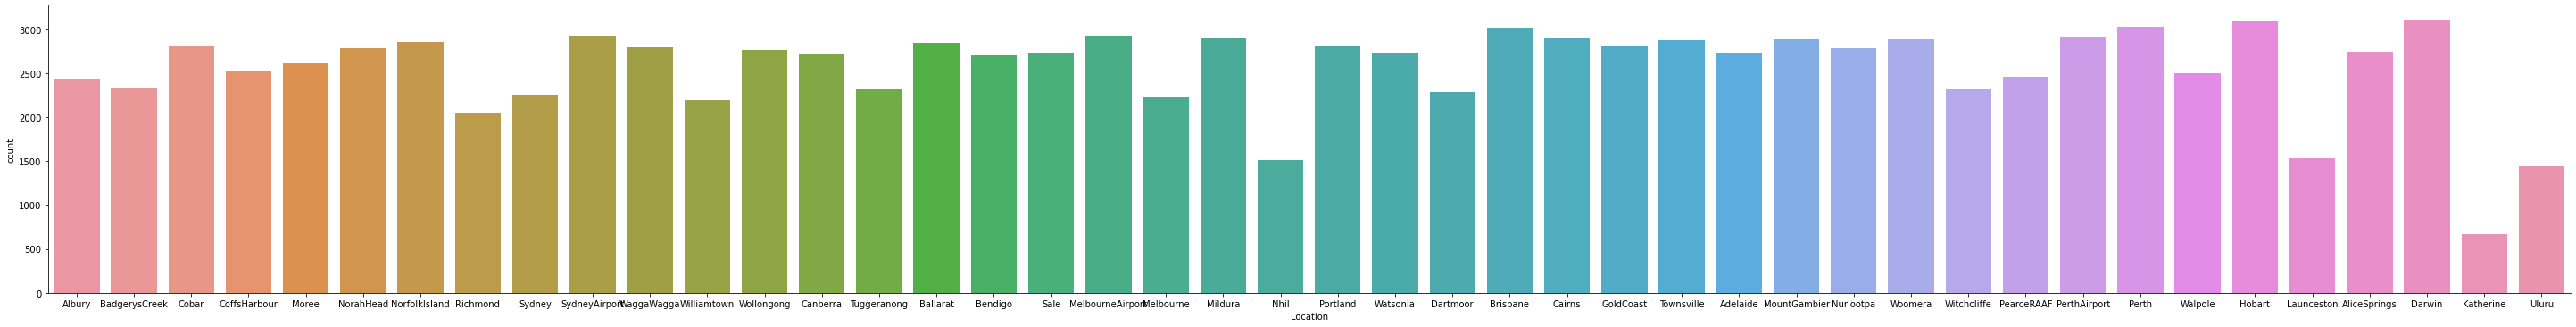

In [15]:
sns.catplot(data=df,x='Location',kind='count',aspect=8)

In [16]:
df['Location'].unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'NorahHead', 'NorfolkIsland', 'Richmond', 'Sydney',
       'SydneyAirport', 'WaggaWagga', 'Williamtown', 'Wollongong',
       'Canberra', 'Tuggeranong', 'Ballarat', 'Bendigo', 'Sale',
       'MelbourneAirport', 'Melbourne', 'Mildura', 'Nhil', 'Portland',
       'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns', 'GoldCoast',
       'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa', 'Woomera',
       'Witchcliffe', 'PearceRAAF', 'PerthAirport', 'Perth', 'Walpole',
       'Hobart', 'Launceston', 'AliceSprings', 'Darwin', 'Katherine',
       'Uluru'], dtype=object)

In [17]:
df["WindGustDir"].unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', 'ENE', 'SSE',
       'S', 'NW', 'SE', 'ESE', 'E', 'SSW'], dtype=object)

In [18]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,RainToday,RainTomorrow,Mean_pressure,Mean_windsp,Mean_Humidity,Mean_Temp
0,Albury,13.4,22.9,0.6,W,44.0,No,No,1007.40,22.0,46.5,19.35
1,Albury,7.4,25.1,0.0,WNW,44.0,No,No,1009.20,13.0,34.5,20.75
2,Albury,12.9,25.7,0.0,WSW,46.0,No,No,1008.15,22.5,34.0,22.10
3,Albury,9.2,28.0,0.0,NE,24.0,No,No,1015.20,10.0,30.5,22.30
4,Albury,17.5,32.3,1.0,W,41.0,No,No,1008.40,13.5,57.5,23.75


In [19]:
windgustdir = {'NNW':0, 'NW':1, 'WNW':2, 'N':3, 'W':4, 'WSW':5, 'NNE':6, 'S':7, 'SSW':8, 'SW':9, 'SSE':10,
       'NE':11, 'SE':12, 'ESE':13, 'ENE':14, 'E':15}


df["WindGustDir"] = df.WindGustDir.map(windgustdir)

In [20]:
df["WindGustDir"].unique()

array([ 4,  2,  5, 11,  0,  3,  6,  9, 14, 10,  7,  1, 12, 13, 15,  8])

In [21]:
df['Location'].unique()


array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'NorahHead', 'NorfolkIsland', 'Richmond', 'Sydney',
       'SydneyAirport', 'WaggaWagga', 'Williamtown', 'Wollongong',
       'Canberra', 'Tuggeranong', 'Ballarat', 'Bendigo', 'Sale',
       'MelbourneAirport', 'Melbourne', 'Mildura', 'Nhil', 'Portland',
       'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns', 'GoldCoast',
       'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa', 'Woomera',
       'Witchcliffe', 'PearceRAAF', 'PerthAirport', 'Perth', 'Walpole',
       'Hobart', 'Launceston', 'AliceSprings', 'Darwin', 'Katherine',
       'Uluru'], dtype=object)

In [22]:
location = {'Albury':1 , 'BadgerysCreek': 2, 'Cobar':3, 'CoffsHarbour':4, 'Moree':5,
       'NorahHead':6, 'NorfolkIsland':7, 'Richmond':8, 'Sydney':9,
       'SydneyAirport':10, 'WaggaWagga':11, 'Williamtown':12, 'Wollongong':13,
       'Canberra':14, 'Tuggeranong':15, 'Ballarat':16, 'Bendigo':17, 'Sale':18,
       'MelbourneAirport':19, 'Melbourne':20, 'Mildura':21, 'Nhil':22, 'Portland':23,
       'Watsonia':24, 'Dartmoor':25, 'Brisbane':26, 'Cairns':27, 'GoldCoast':28,
       'Townsville':29, 'Adelaide':30, 'MountGambier':31, 'Nuriootpa':32, 'Woomera':33,
       'Witchcliffe':34, 'PearceRAAF':35, 'PerthAirport':36, 'Perth':37, 'Walpole':38,
       'Hobart':39, 'Launceston':40, 'AliceSprings':41, 'Darwin':42, 'Katherine':43,
       'Uluru':44}
df["Location"] = df["Location"].map(location)

In [23]:
df['Location'].unique()


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44])

In [24]:
raintoday = {'Yes':1, 'No':0}
raintomo = {'Yes':1, 'No':0}
df["RainToday"] = df["RainToday"].map(raintoday)
df["RainTomorrow"] = df["RainTomorrow"].map(raintomo)

In [25]:
df

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,RainToday,RainTomorrow,Mean_pressure,Mean_windsp,Mean_Humidity,Mean_Temp
0,1,13.4,22.9,0.6,4,44.0,0,0,1007.40,22.0,46.5,19.35
1,1,7.4,25.1,0.0,2,44.0,0,0,1009.20,13.0,34.5,20.75
2,1,12.9,25.7,0.0,5,46.0,0,0,1008.15,22.5,34.0,22.10
3,1,9.2,28.0,0.0,11,24.0,0,0,1015.20,10.0,30.5,22.30
4,1,17.5,32.3,1.0,4,41.0,0,0,1008.40,13.5,57.5,23.75
...,...,...,...,...,...,...,...,...,...,...,...,...
145454,44,3.5,21.8,0.0,15,31.0,0,0,1022.95,14.0,43.0,15.15
145455,44,2.8,23.4,0.0,15,31.0,0,0,1022.45,12.0,37.5,16.25
145456,44,3.6,25.3,0.0,0,22.0,0,0,1021.30,11.0,38.5,17.70
145457,44,5.4,26.9,0.0,3,37.0,0,0,1018.90,9.0,38.5,19.30


<AxesSubplot:xlabel='MinTemp', ylabel='MaxTemp'>

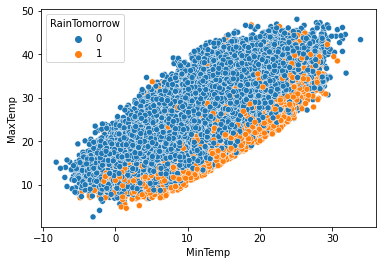

In [26]:
sns.scatterplot(x='MinTemp',y='MaxTemp',hue='RainTomorrow',data=df,)

<AxesSubplot:xlabel='Mean_pressure', ylabel='Mean_Humidity'>

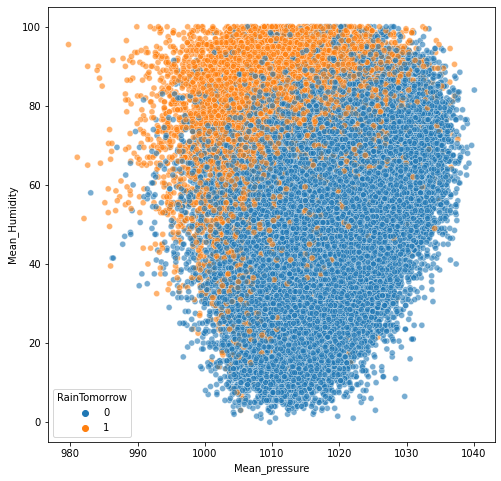

In [27]:
plt.figure(figsize=(8,8))
sns.scatterplot(x='Mean_pressure',y='Mean_Humidity',hue='RainTomorrow',data=df,alpha=0.6)

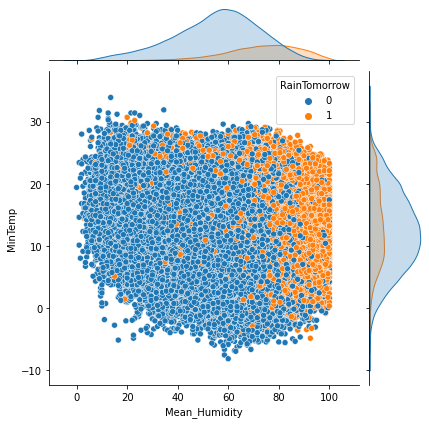

In [28]:
sns.jointplot(
    x='Mean_Humidity',
    y='MinTemp',
    data=df,
    kind='scatter',
    color='Red',
    height=6,
    ratio=5,
    space=0.2,
    hue='RainTomorrow',
)

<AxesSubplot:>

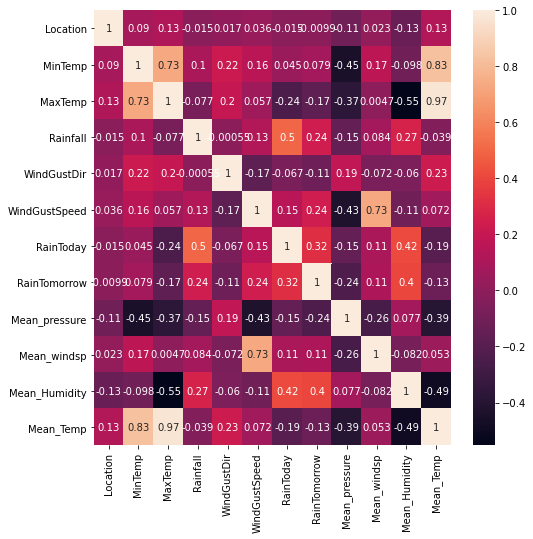

In [29]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True)

In [30]:
x = df.drop(['RainTomorrow'],axis=1)
y = df['RainTomorrow']

In [31]:
x.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,RainToday,Mean_pressure,Mean_windsp,Mean_Humidity,Mean_Temp
0,1,13.4,22.9,0.6,4,44.0,0,1007.40,22.0,46.5,19.35
1,1,7.4,25.1,0.0,2,44.0,0,1009.20,13.0,34.5,20.75
2,1,12.9,25.7,0.0,5,46.0,0,1008.15,22.5,34.0,22.10
3,1,9.2,28.0,0.0,11,24.0,0,1015.20,10.0,30.5,22.30
4,1,17.5,32.3,1.0,4,41.0,0,1008.40,13.5,57.5,23.75


In [32]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: RainTomorrow, dtype: int64

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
X_train,X_test,y_train,y_test= train_test_split(x,y,test_size = 0.2 )

In [35]:
len(X_test)

22585

In [36]:
log_model = LogisticRegression()

In [37]:
pipe_lr = Pipeline([('scaler_1', StandardScaler()), ('log_model',LogisticRegression())])
pipe_dt = Pipeline([('scaler_2', StandardScaler()), ('des_tree',DecisionTreeClassifier())])
pipe_rf = Pipeline([('scaler_3', StandardScaler()), ('RFC',RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=3))])

In [38]:
pipe_lr.fit(X_train,y_train)
pred_lr= pipe_lr.predict(X_test)

In [39]:
print(accuracy_score(y_test,pred_lr))

0.8405578924064645


In [40]:
pipe_dt.fit(X_train,y_train)
pred_dt= pipe_dt.predict(X_test)

In [41]:
print(accuracy_score(y_test,pred_dt))

0.7789683418197919


<AxesSubplot:>

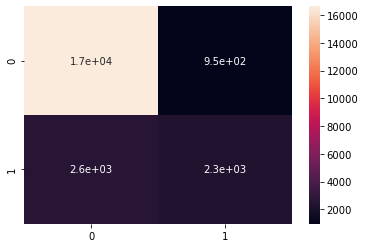

In [42]:
cm= confusion_matrix(y_test,pred_lr)
sns.heatmap(cm,annot=True)

In [43]:
pipe_rf.fit(X_train,y_train)
pred_rf = pipe_rf.predict(X_test)

In [44]:
print(accuracy_score(y_test,pred_rf))

0.8514943546601726


In [45]:
import pickle
pickle_out = open('log_regg3.pkl','wb')
pickle.dump(pipe_lr,pickle_out)
pickle_out.close()

In [46]:
pickle_out = open('RFC3.pkl','wb')
pickle.dump(pipe_rf,pickle_out)
pickle_out.close()